<a href="https://colab.research.google.com/github/phanishwarKumar/Projects/blob/master/LSTM_STOCK_API_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [29]:
### Data Collection
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from pandas_datareader import data

In [104]:
import yfinance as yf
start = '2011-01-01'
end = '2023-03-25'
ticker = 'SBIN.NS'
df = yf.download(ticker, start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close   
Date                                                                     
2023-03-20  526.599976  526.599976  515.000000  519.200012  519.200012  \
2023-03-21  522.000000  523.450012  516.450012  521.849976  521.849976   
2023-03-22  522.200012  527.000000  520.099976  521.549988  521.549988   
2023-03-23  519.400024  521.000000  511.500000  512.750000  512.750000   
2023-03-24  514.500000  514.950012  503.450012  505.350006  505.350006   

              Volume  
Date                  
2023-03-20  14275315  
2023-03-21  29485180  
2023-03-22  11619538  
2023-03-23  22097792  
2023-03-24  14416984

In [105]:
df['Price'] = df['Close']

In [106]:
df

Open        High         Low       Close   Adj Close   
Date                                                                     
2011-01-03  283.269989  285.200012  281.515015  282.209991  249.201889  \
2011-01-04  283.440002  283.440002  272.714996  273.559998  241.563614   
2011-01-05  273.500000  273.640015  268.200012  269.320007  237.819519   
2011-01-06  271.399994  271.399994  261.309998  262.239990  231.567596   
2011-01-07  261.790009  264.200012  256.714996  260.095001  229.673508   
...                ...         ...         ...         ...         ...   
2023-03-20  526.599976  526.599976  515.000000  519.200012  519.200012   
2023-03-21  522.000000  523.450012  516.450012  521.849976  521.849976   
2023-03-22  522.200012  527.000000  520.099976  521.549988  521.549988   
2023-03-23  519.400024  521.000000  511.500000  512.750000  512.750000   
2023-03-24  514.500000  514.950012  503.450012  505.350006  505.350006   

              Volume       Price  
Date                              
2011-01-03  11060070  282.209991  
2011-01-04  31035310  273.559998  
2011-01-05  25213120  269.320007  
2011-01-06  37167080  262.239990  
2011-01-07  44430600  260.095001  
...              ...         ...  
2023-03-20  14275315  519.200012  
2023-03-21  29485180  521.849976  
2023-03-22  11619538  521.549988  
2023-03-23  22097792  512.750000  
2023-03-24  14416984  505.350006  

[3017 rows x 7 columns]

In [107]:
df['Price']=df['Price'].shift(1)
df

Open        High         Low       Close   Adj Close   
Date                                                                     
2011-01-03  283.269989  285.200012  281.515015  282.209991  249.201889  \
2011-01-04  283.440002  283.440002  272.714996  273.559998  241.563614   
2011-01-05  273.500000  273.640015  268.200012  269.320007  237.819519   
2011-01-06  271.399994  271.399994  261.309998  262.239990  231.567596   
2011-01-07  261.790009  264.200012  256.714996  260.095001  229.673508   
...                ...         ...         ...         ...         ...   
2023-03-20  526.599976  526.599976  515.000000  519.200012  519.200012   
2023-03-21  522.000000  523.450012  516.450012  521.849976  521.849976   
2023-03-22  522.200012  527.000000  520.099976  521.549988  521.549988   
2023-03-23  519.400024  521.000000  511.500000  512.750000  512.750000   
2023-03-24  514.500000  514.950012  503.450012  505.350006  505.350006   

              Volume       Price  
Date                              
2011-01-03  11060070         NaN  
2011-01-04  31035310  282.209991  
2011-01-05  25213120  273.559998  
2011-01-06  37167080  269.320007  
2011-01-07  44430600  262.239990  
...              ...         ...  
2023-03-20  14275315  529.799988  
2023-03-21  29485180  519.200012  
2023-03-22  11619538  521.849976  
2023-03-23  22097792  521.549988  
2023-03-24  14416984  512.750000  

[3017 rows x 7 columns]

In [108]:
df=df[1:]

In [109]:
df

Open        High         Low       Close   Adj Close   
Date                                                                     
2011-01-04  283.440002  283.440002  272.714996  273.559998  241.563614  \
2011-01-05  273.500000  273.640015  268.200012  269.320007  237.819519   
2011-01-06  271.399994  271.399994  261.309998  262.239990  231.567596   
2011-01-07  261.790009  264.200012  256.714996  260.095001  229.673508   
2011-01-10  259.984985  263.399994  253.600006  254.710007  224.918365   
...                ...         ...         ...         ...         ...   
2023-03-20  526.599976  526.599976  515.000000  519.200012  519.200012   
2023-03-21  522.000000  523.450012  516.450012  521.849976  521.849976   
2023-03-22  522.200012  527.000000  520.099976  521.549988  521.549988   
2023-03-23  519.400024  521.000000  511.500000  512.750000  512.750000   
2023-03-24  514.500000  514.950012  503.450012  505.350006  505.350006   

              Volume       Price  
Date                              
2011-01-04  31035310  282.209991  
2011-01-05  25213120  273.559998  
2011-01-06  37167080  269.320007  
2011-01-07  44430600  262.239990  
2011-01-10  29547190  260.095001  
...              ...         ...  
2023-03-20  14275315  529.799988  
2023-03-21  29485180  519.200012  
2023-03-22  11619538  521.849976  
2023-03-23  22097792  521.549988  
2023-03-24  14416984  512.750000  

[3016 rows x 7 columns]

In [110]:
MA = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,200]

for i in range (0,len(MA)):
  df['MA'+"_"+str(MA[i])]=df['Price'].rolling(MA[i]).mean()


df

<ipython-input-110-ce30c98fc49e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA'+"_"+str(MA[i])]=df['Price'].rolling(MA[i]).mean()
<ipython-input-110-ce30c98fc49e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA'+"_"+str(MA[i])]=df['Price'].rolling(MA[i]).mean()
<ipython-input-110-ce30c98fc49e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Open        High         Low       Close   Adj Close   
Date                                                                     
2011-01-04  283.440002  283.440002  272.714996  273.559998  241.563614  \
2011-01-05  273.500000  273.640015  268.200012  269.320007  237.819519   
2011-01-06  271.399994  271.399994  261.309998  262.239990  231.567596   
2011-01-07  261.790009  264.200012  256.714996  260.095001  229.673508   
2011-01-10  259.984985  263.399994  253.600006  254.710007  224.918365   
...                ...         ...         ...         ...         ...   
2023-03-20  526.599976  526.599976  515.000000  519.200012  519.200012   
2023-03-21  522.000000  523.450012  516.450012  521.849976  521.849976   
2023-03-22  522.200012  527.000000  520.099976  521.549988  521.549988   
2023-03-23  519.400024  521.000000  511.500000  512.750000  512.750000   
2023-03-24  514.500000  514.950012  503.450012  505.350006  505.350006   

              Volume       Price        MA_5       MA_10       MA_15  ...   
Date                                                                  ...   
2011-01-04  31035310  282.209991         NaN         NaN         NaN  ...  \
2011-01-05  25213120  273.559998         NaN         NaN         NaN  ...   
2011-01-06  37167080  269.320007         NaN         NaN         NaN  ...   
2011-01-07  44430600  262.239990         NaN         NaN         NaN  ...   
2011-01-10  29547190  260.095001  269.484998         NaN         NaN  ...   
...              ...         ...         ...         ...         ...  ...   
2023-03-20  14275315  529.799988  525.450000  542.120001  537.546667  ...   
2023-03-21  29485180  519.200012  523.290002  537.920001  537.423336  ...   
2023-03-22  11619538  521.849976  522.579993  533.934998  537.033333  ...   
2023-03-23  22097792  521.549988  523.379993  529.609998  536.950000  ...   
2023-03-24  14416984  512.750000  521.029993  524.994995  535.353333  ...   

                MA_110      MA_115      MA_120    MA_125      MA_130   
Date                                                                   
2011-01-04         NaN         NaN         NaN       NaN         NaN  \
2011-01-05         NaN         NaN         NaN       NaN         NaN   
2011-01-06         NaN         NaN         NaN       NaN         NaN   
2011-01-07         NaN         NaN         NaN       NaN         NaN   
2011-01-10         NaN         NaN         NaN       NaN         NaN   
...                ...         ...         ...       ...         ...   
2023-03-20  575.359546  573.393479  571.643751  571.4492  571.151924   
2023-03-21  575.285001  573.388697  571.442917  571.0248  570.877308   
2023-03-22  575.176364  573.294349  571.320834  570.6072  570.599231   
2023-03-23  575.177273  573.157392  571.293334  570.2220  570.213077   
2023-03-24  575.045910  573.005653  571.218334  569.7856  569.756154   

                MA_135      MA_140      MA_145      MA_150      MA_200  
Date                                                                    
2011-01-04         NaN         NaN         NaN         NaN         NaN  
2011-01-05         NaN         NaN         NaN         NaN         NaN  
2011-01-06         NaN         NaN         NaN         NaN         NaN  
2011-01-07         NaN         NaN         NaN         NaN         NaN  
2011-01-10         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-03-20  570.054074  568.551429  566.830690  565.549000  545.124001  
2023-03-21  569.908148  568.518572  566.822759  565.512000  545.378501  
2023-03-22  569.790000  568.568572  566.895517  565.453000  545.638501  
2023-03-23  569.706297  568.499286  566.893103  565.423667  545.923750  
2023-03-24  569.470000  568.352500  566.847931  565.321000  546.169000  

[3016 rows x 38 columns]

In [111]:
df.head()

Open        High         Low       Close   Adj Close   
Date                                                                     
2011-01-04  283.440002  283.440002  272.714996  273.559998  241.563614  \
2011-01-05  273.500000  273.640015  268.200012  269.320007  237.819519   
2011-01-06  271.399994  271.399994  261.309998  262.239990  231.567596   
2011-01-07  261.790009  264.200012  256.714996  260.095001  229.673508   
2011-01-10  259.984985  263.399994  253.600006  254.710007  224.918365   

              Volume       Price        MA_5  MA_10  MA_15  ...  MA_110   
Date                                                        ...           
2011-01-04  31035310  282.209991         NaN    NaN    NaN  ...     NaN  \
2011-01-05  25213120  273.559998         NaN    NaN    NaN  ...     NaN   
2011-01-06  37167080  269.320007         NaN    NaN    NaN  ...     NaN   
2011-01-07  44430600  262.239990         NaN    NaN    NaN  ...     NaN   
2011-01-10  29547190  260.095001  269.484998    NaN    NaN  ...     NaN   

            MA_115  MA_120  MA_125  MA_130  MA_135  MA_140  MA_145  MA_150   
Date                                                                         
2011-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  \
2011-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

            MA_200  
Date                
2011-01-04     NaN  
2011-01-05     NaN  
2011-01-06     NaN  
2011-01-07     NaN  
2011-01-10     NaN  

[5 rows x 38 columns]

In [112]:
df=df.reset_index().drop(columns=['Date'])
df

Open        High         Low       Close   Adj Close    Volume   
0     283.440002  283.440002  272.714996  273.559998  241.563614  31035310  \
1     273.500000  273.640015  268.200012  269.320007  237.819519  25213120   
2     271.399994  271.399994  261.309998  262.239990  231.567596  37167080   
3     261.790009  264.200012  256.714996  260.095001  229.673508  44430600   
4     259.984985  263.399994  253.600006  254.710007  224.918365  29547190   
...          ...         ...         ...         ...         ...       ...   
3011  526.599976  526.599976  515.000000  519.200012  519.200012  14275315   
3012  522.000000  523.450012  516.450012  521.849976  521.849976  29485180   
3013  522.200012  527.000000  520.099976  521.549988  521.549988  11619538   
3014  519.400024  521.000000  511.500000  512.750000  512.750000  22097792   
3015  514.500000  514.950012  503.450012  505.350006  505.350006  14416984   

           Price        MA_5       MA_10       MA_15  ...      MA_110   
0     282.209991         NaN         NaN         NaN  ...         NaN  \
1     273.559998         NaN         NaN         NaN  ...         NaN   
2     269.320007         NaN         NaN         NaN  ...         NaN   
3     262.239990         NaN         NaN         NaN  ...         NaN   
4     260.095001  269.484998         NaN         NaN  ...         NaN   
...          ...         ...         ...         ...  ...         ...   
3011  529.799988  525.450000  542.120001  537.546667  ...  575.359546   
3012  519.200012  523.290002  537.920001  537.423336  ...  575.285001   
3013  521.849976  522.579993  533.934998  537.033333  ...  575.176364   
3014  521.549988  523.379993  529.609998  536.950000  ...  575.177273   
3015  512.750000  521.029993  524.994995  535.353333  ...  575.045910   

          MA_115      MA_120    MA_125      MA_130      MA_135      MA_140   
0            NaN         NaN       NaN         NaN         NaN         NaN  \
1            NaN         NaN       NaN         NaN         NaN         NaN   
2            NaN         NaN       NaN         NaN         NaN         NaN   
3            NaN         NaN       NaN         NaN         NaN         NaN   
4            NaN         NaN       NaN         NaN         NaN         NaN   
...          ...         ...       ...         ...         ...         ...   
3011  573.393479  571.643751  571.4492  571.151924  570.054074  568.551429   
3012  573.388697  571.442917  571.0248  570.877308  569.908148  568.518572   
3013  573.294349  571.320834  570.6072  570.599231  569.790000  568.568572   
3014  573.157392  571.293334  570.2220  570.213077  569.706297  568.499286   
3015  573.005653  571.218334  569.7856  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2            NaN         NaN         NaN  
3            NaN         NaN         NaN  
4            NaN         NaN         NaN  
...          ...         ...         ...  
3011  566.830690  565.549000  545.124001  
3012  566.822759  565.512000  545.378501  
3013  566.895517  565.453000  545.638501  
3014  566.893103  565.423667  545.923750  
3015  566.847931  565.321000  546.169000  

[3016 rows x 38 columns]

In [113]:
df=df.drop(columns=['Open','Low','High','Adj Close','Volume'])

In [114]:
df = df[201:]

In [115]:
#df = df[:201]

In [116]:
df.to_csv('SBIN.NS.csv')

In [117]:
df

Close       Price        MA_5       MA_10       MA_15       MA_20   
201   183.979996  190.875000  191.539001  188.778001  185.022334  187.673750  \
202   190.979996  183.979996  191.004001  189.530501  184.877000  187.116000   
203   190.630005  190.979996  190.832999  189.908000  185.694333  186.678500   
204   190.139999  190.630005  190.257999  190.097501  186.947000  186.363250   
205   190.940002  190.139999  189.320999  190.259500  187.941000  186.108500   
...          ...         ...         ...         ...         ...         ...   
3011  519.200012  529.799988  525.450000  542.120001  537.546667  534.007501   
3012  521.849976  519.200012  523.290002  537.920001  537.423336  533.417502   
3013  521.549988  521.849976  522.579993  533.934998  537.033333  533.252499   
3014  512.750000  521.549988  523.379993  529.609998  536.950000  533.157498   
3015  505.350006  512.750000  521.029993  524.994995  535.353333  532.977499   

           MA_25       MA_30       MA_35       MA_40  ...      MA_110   
201   189.359200  189.021500  190.562857  191.126125  ...  215.872591  \
202   189.050600  188.942833  190.086428  190.826250  ...  215.403545   
203   188.727000  189.199333  189.886714  190.881125  ...  215.028545   
204   188.313799  189.464500  189.539714  190.800375  ...  214.652045   
205   188.169199  189.475667  189.189857  190.619375  ...  214.335363   
...          ...         ...         ...         ...  ...         ...   
3011  535.755999  537.704999  537.664284  544.094998  ...  575.359546   
3012  534.402000  536.871665  537.071427  542.328749  ...  575.285001   
3013  533.775999  536.086664  536.604283  540.569998  ...  575.176364   
3014  533.003999  535.234998  535.691425  538.597498  ...  575.177273   
3015  531.823999  534.001664  535.274283  536.557498  ...  575.045910   

          MA_115      MA_120      MA_125      MA_130      MA_135      MA_140   
201   217.788652  219.646083  221.938000  224.357461  226.374704  228.210857  \
202   217.062391  218.999416  221.081479  223.670115  225.679555  227.582464   
203   216.426174  218.422250  220.324719  222.989076  225.031851  226.972821   
204   215.779782  217.802583  219.606079  222.254577  224.355777  226.337143   
205   215.158130  217.201041  218.973040  221.471961  223.684111  225.697178   
...          ...         ...         ...         ...         ...         ...   
3011  573.393479  571.643751  571.449200  571.151924  570.054074  568.551429   
3012  573.388697  571.442917  571.024800  570.877308  569.908148  568.518572   
3013  573.294349  571.320834  570.607200  570.599231  569.790000  568.568572   
3014  573.157392  571.293334  570.222000  570.213077  569.706297  568.499286   
3015  573.005653  571.218334  569.785600  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
201   229.892827  230.954266  238.920325  
202   229.292103  230.453966  238.493625  
203   228.713172  230.005433  238.137325  
204   228.118965  229.529266  237.790000  
205   227.460551  229.035099  237.467150  
...          ...         ...         ...  
3011  566.830690  565.549000  545.124001  
3012  566.822759  565.512000  545.378501  
3013  566.895517  565.453000  545.638501  
3014  566.893103  565.423667  545.923750  
3015  566.847931  565.321000  546.169000  

[2815 rows x 33 columns]

In [118]:
df=pd.read_csv('SBIN.NS.csv')

In [119]:
df.describe()

Unnamed: 0        Close        Price         MA_5        MA_10   
count  2815.000000  2815.000000  2815.000000  2815.000000  2815.000000  \
mean   1608.000000   290.935771   290.824057   290.593264   290.296365   
std     812.764829   108.183802   108.124665   107.842448   107.501798   
min     201.000000   147.360001   147.360001   148.765997   149.778499   
25%     904.500000   215.877495   215.839996   215.178001   215.430499   
50%    1608.000000   265.255005   265.200012   264.949994   265.529999   
75%    2311.500000   316.575012   316.425003   315.710001   315.350003   
max    3015.000000   625.500000   625.500000   617.550000   614.025000   

             MA_15        MA_20        MA_25        MA_30        MA_35  ...   
count  2815.000000  2815.000000  2815.000000  2815.000000  2815.000000  ...  \
mean    289.981043   289.666059   289.361120   289.056107   288.748551  ...   
std     107.131817   106.746535   106.366543   105.981835   105.587663  ...   
min     150.434332   150.712499   151.578800   153.112500   154.709571  ...   
25%     215.294166   215.716125   215.396899   215.388834   215.079428  ...   
50%     265.279333   265.081249   265.308003   265.498166   265.370000  ...   
75%     314.841668   313.596249   312.289998   311.884998   310.835714  ...   
max     611.689998   610.229999   608.131997   607.633329   606.665716  ...   

            MA_110       MA_115       MA_120       MA_125       MA_130   
count  2815.000000  2815.000000  2815.000000  2815.000000  2815.000000  \
mean    283.938830   283.620617   283.309208   283.004181   282.704501   
std      97.989145    97.433537    96.885759    96.344556    95.802997   
min     167.009091   166.981130   166.998291   166.710280   166.205731   
25%     211.600341   211.707304   211.849521   211.975420   212.176212   
50%     266.478637   266.624218   266.639750   266.658000   266.951577   
75%     300.144999   298.553912   296.983541   295.961200   295.978846   
max     578.047728   576.323044   574.454584   573.028000   571.769616   

            MA_135       MA_140       MA_145       MA_150       MA_200  
count  2815.000000  2815.000000  2815.000000  2815.000000  2815.000000  
mean    282.408004   282.115463   281.827390   281.543529   278.888352  
std      95.257840    94.712393    94.169560    93.631310    88.430965  
min     165.795444   165.566286   165.558517   165.591833   170.406400  
25%     212.220222   212.088018   211.719862   211.709650   214.186400  
50%     267.168149   267.560000   268.038966   268.215000   267.268500  
75%     295.785555   295.462678   294.826552   294.247666   292.629500  
max     570.271852   568.568572   566.967931   565.635667   546.169000  

[8 rows x 34 columns]

In [120]:
df.tail()

Unnamed: 0       Close       Price        MA_5       MA_10       MA_15   
2810        3011  519.200012  529.799988  525.450000  542.120001  537.546667  \
2811        3012  521.849976  519.200012  523.290002  537.920001  537.423336   
2812        3013  521.549988  521.849976  522.579993  533.934998  537.033333   
2813        3014  512.750000  521.549988  523.379993  529.609998  536.950000   
2814        3015  505.350006  512.750000  521.029993  524.994995  535.353333   

           MA_20       MA_25       MA_30       MA_35  ...      MA_110   
2810  534.007501  535.755999  537.704999  537.664284  ...  575.359546  \
2811  533.417502  534.402000  536.871665  537.071427  ...  575.285001   
2812  533.252499  533.775999  536.086664  536.604283  ...  575.176364   
2813  533.157498  533.003999  535.234998  535.691425  ...  575.177273   
2814  532.977499  531.823999  534.001664  535.274283  ...  575.045910   

          MA_115      MA_120    MA_125      MA_130      MA_135      MA_140   
2810  573.393479  571.643751  571.4492  571.151924  570.054074  568.551429  \
2811  573.388697  571.442917  571.0248  570.877308  569.908148  568.518572   
2812  573.294349  571.320834  570.6072  570.599231  569.790000  568.568572   
2813  573.157392  571.293334  570.2220  570.213077  569.706297  568.499286   
2814  573.005653  571.218334  569.7856  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
2810  566.830690  565.549000  545.124001  
2811  566.822759  565.512000  545.378501  
2812  566.895517  565.453000  545.638501  
2813  566.893103  565.423667  545.923750  
2814  566.847931  565.321000  546.169000  

[5 rows x 34 columns]

In [121]:
df1=df.copy(deep=True)

In [122]:
df1

Unnamed: 0       Close       Price        MA_5       MA_10       MA_15   
0            201  183.979996  190.875000  191.539001  188.778001  185.022334  \
1            202  190.979996  183.979996  191.004001  189.530501  184.877000   
2            203  190.630005  190.979996  190.832999  189.908000  185.694333   
3            204  190.139999  190.630005  190.257999  190.097501  186.947000   
4            205  190.940002  190.139999  189.320999  190.259500  187.941000   
...          ...         ...         ...         ...         ...         ...   
2810        3011  519.200012  529.799988  525.450000  542.120001  537.546667   
2811        3012  521.849976  519.200012  523.290002  537.920001  537.423336   
2812        3013  521.549988  521.849976  522.579993  533.934998  537.033333   
2813        3014  512.750000  521.549988  523.379993  529.609998  536.950000   
2814        3015  505.350006  512.750000  521.029993  524.994995  535.353333   

           MA_20       MA_25       MA_30       MA_35  ...      MA_110   
0     187.673750  189.359200  189.021500  190.562857  ...  215.872591  \
1     187.116000  189.050600  188.942833  190.086428  ...  215.403545   
2     186.678500  188.727000  189.199333  189.886714  ...  215.028545   
3     186.363250  188.313799  189.464500  189.539714  ...  214.652045   
4     186.108500  188.169199  189.475667  189.189857  ...  214.335363   
...          ...         ...         ...         ...  ...         ...   
2810  534.007501  535.755999  537.704999  537.664284  ...  575.359546   
2811  533.417502  534.402000  536.871665  537.071427  ...  575.285001   
2812  533.252499  533.775999  536.086664  536.604283  ...  575.176364   
2813  533.157498  533.003999  535.234998  535.691425  ...  575.177273   
2814  532.977499  531.823999  534.001664  535.274283  ...  575.045910   

          MA_115      MA_120      MA_125      MA_130      MA_135      MA_140   
0     217.788652  219.646083  221.938000  224.357461  226.374704  228.210857  \
1     217.062391  218.999416  221.081479  223.670115  225.679555  227.582464   
2     216.426174  218.422250  220.324719  222.989076  225.031851  226.972821   
3     215.779782  217.802583  219.606079  222.254577  224.355777  226.337143   
4     215.158130  217.201041  218.973040  221.471961  223.684111  225.697178   
...          ...         ...         ...         ...         ...         ...   
2810  573.393479  571.643751  571.449200  571.151924  570.054074  568.551429   
2811  573.388697  571.442917  571.024800  570.877308  569.908148  568.518572   
2812  573.294349  571.320834  570.607200  570.599231  569.790000  568.568572   
2813  573.157392  571.293334  570.222000  570.213077  569.706297  568.499286   
2814  573.005653  571.218334  569.785600  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
0     229.892827  230.954266  238.920325  
1     229.292103  230.453966  238.493625  
2     228.713172  230.005433  238.137325  
3     228.118965  229.529266  237.790000  
4     227.460551  229.035099  237.467150  
...          ...         ...         ...  
2810  566.830690  565.549000  545.124001  
2811  566.822759  565.512000  545.378501  
2812  566.895517  565.453000  545.638501  
2813  566.893103  565.423667  545.923750  
2814  566.847931  565.321000  546.169000  

[2815 rows x 34 columns]

In [123]:
df1= df.drop(columns=['Unnamed: 0'])

In [124]:
columns = df1.columns

In [125]:
columns

Index(['Close', 'Price', 'MA_5', 'MA_10', 'MA_15', 'MA_20', 'MA_25', 'MA_30',
       'MA_35', 'MA_40', 'MA_45', 'MA_50', 'MA_55', 'MA_60', 'MA_65', 'MA_70',
       'MA_75', 'MA_80', 'MA_85', 'MA_90', 'MA_95', 'MA_100', 'MA_105',
       'MA_110', 'MA_115', 'MA_120', 'MA_125', 'MA_130', 'MA_135', 'MA_140',
       'MA_145', 'MA_150', 'MA_200'],
      dtype='object')

In [126]:
lbl='Close'

In [127]:
import seaborn as sns

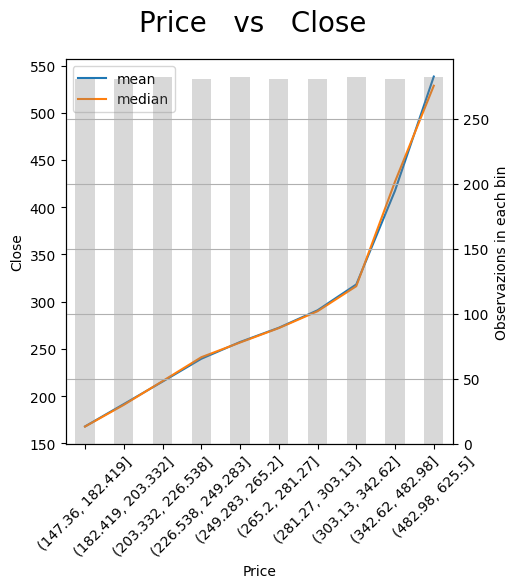

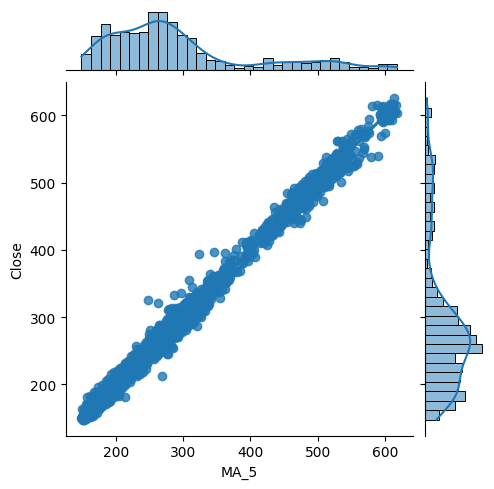

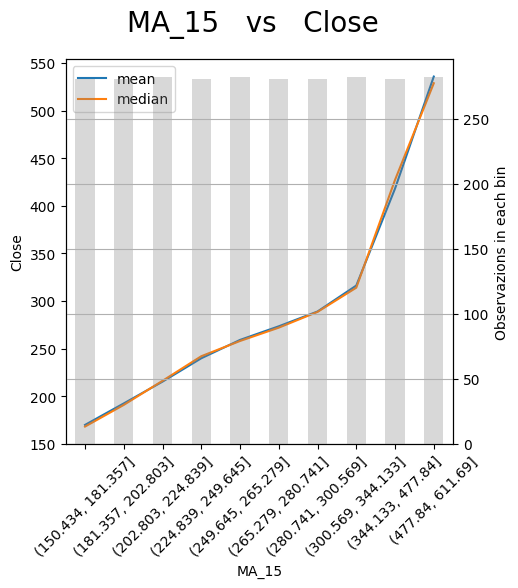

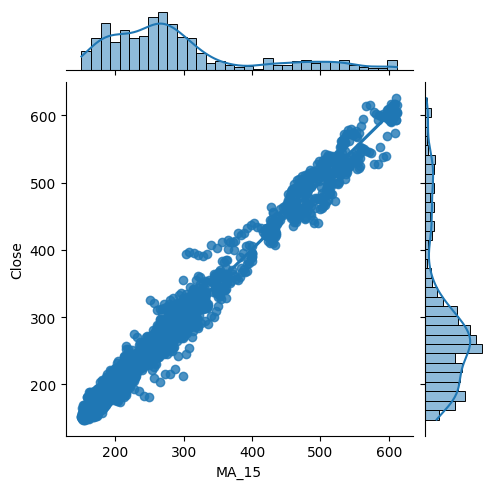

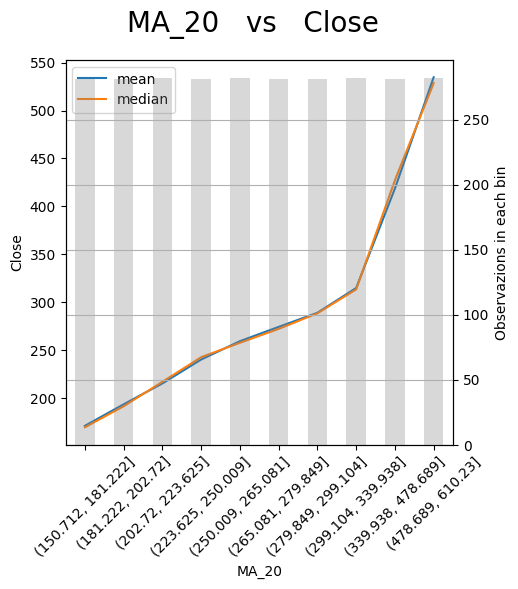

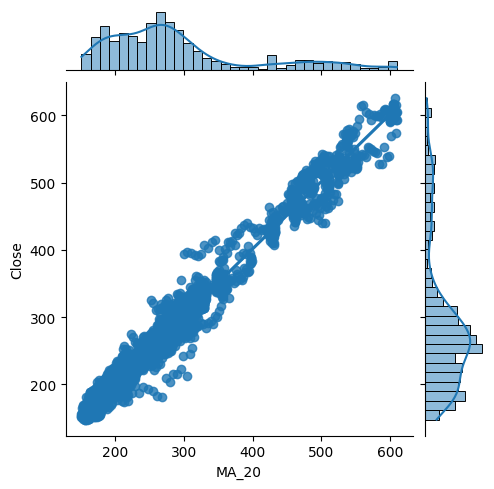

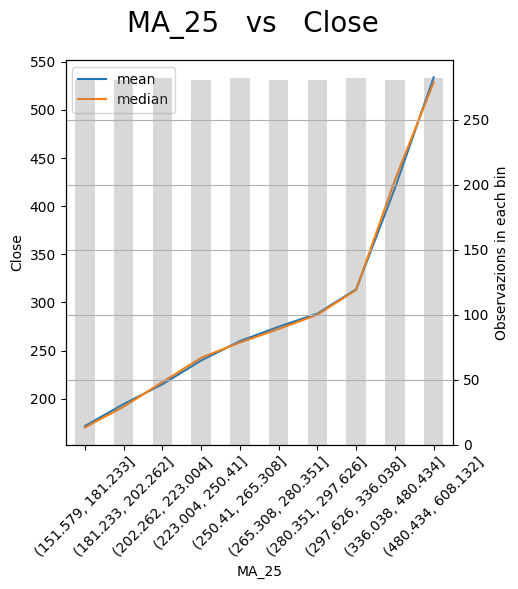

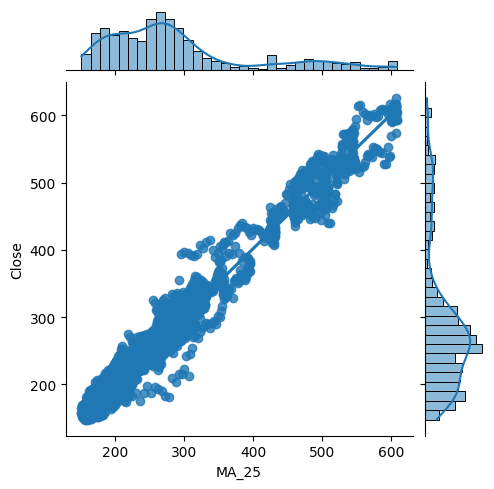

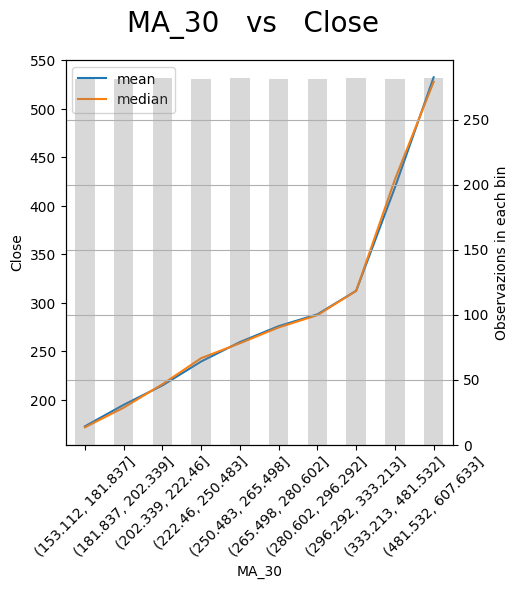

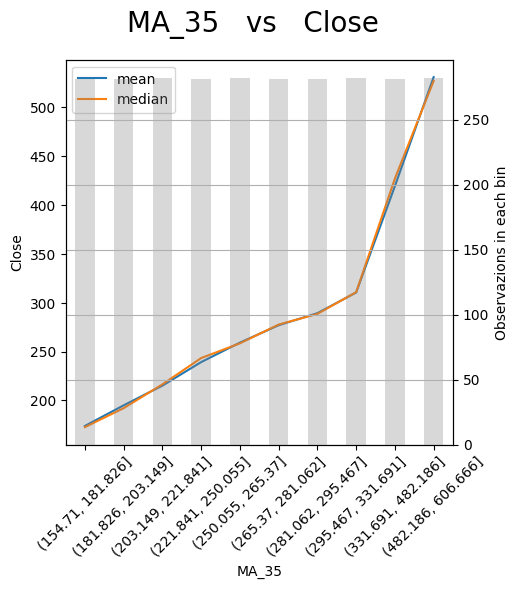

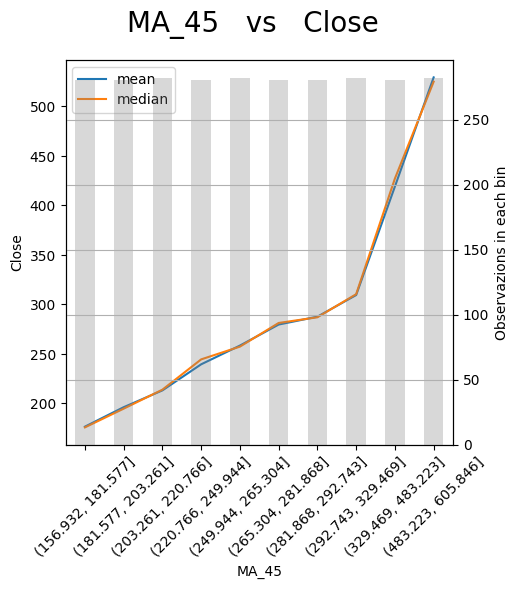

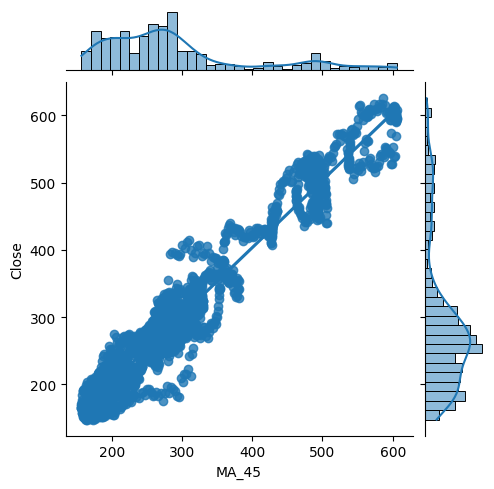

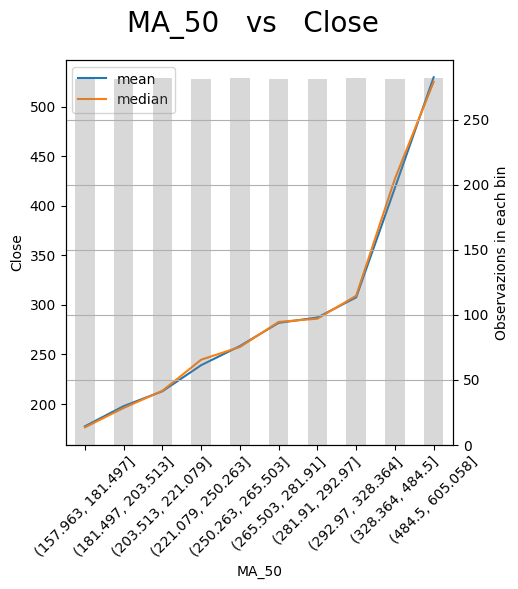

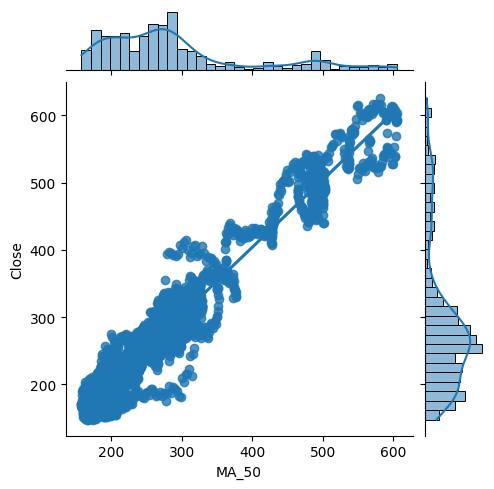

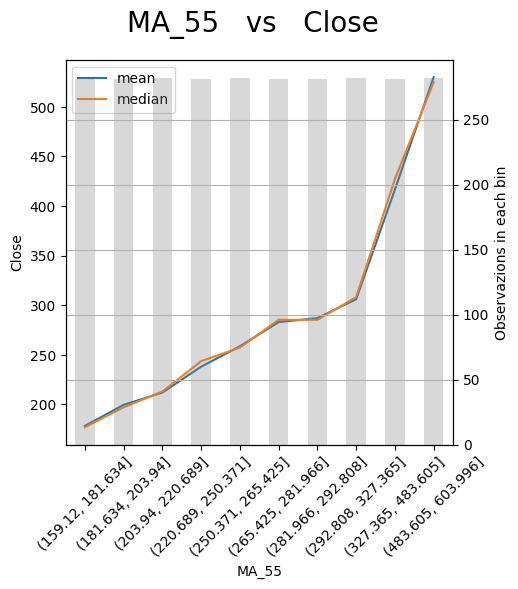

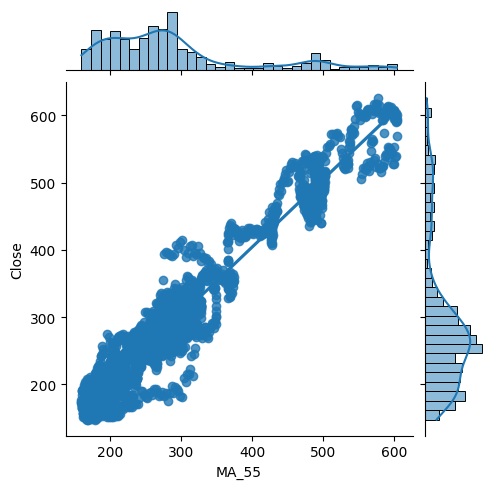

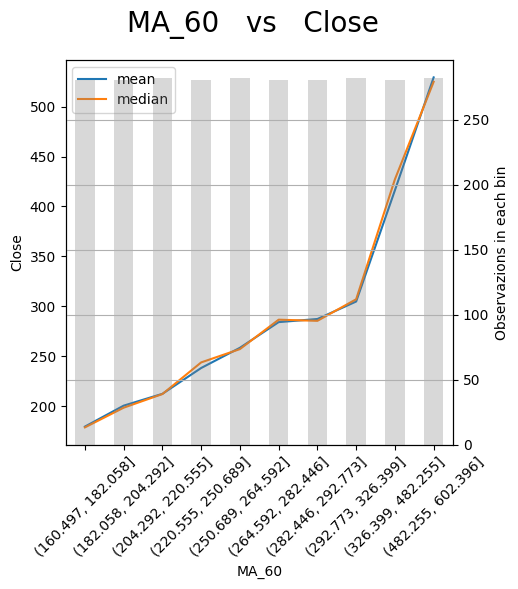

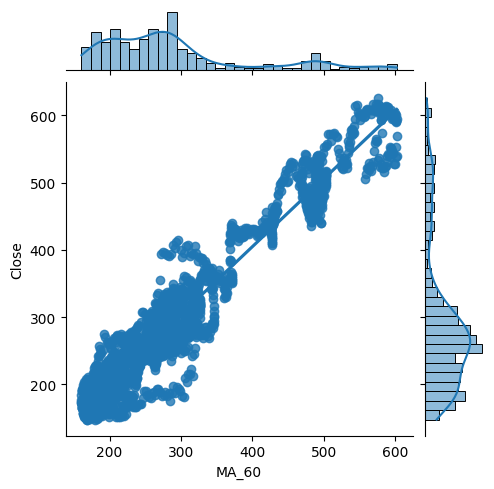

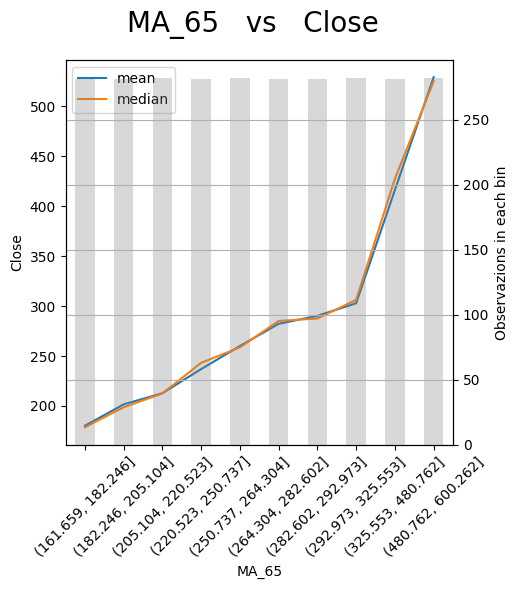

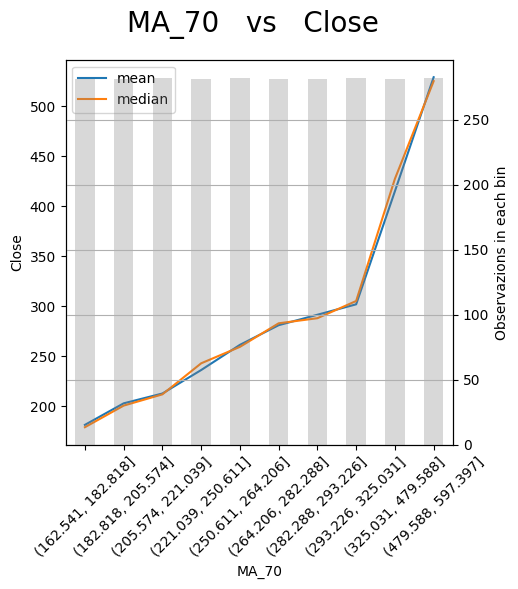

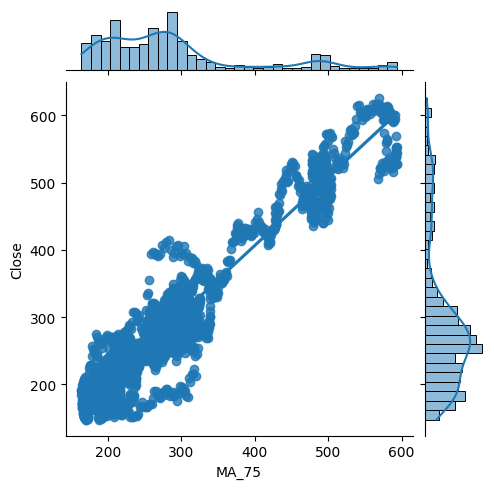

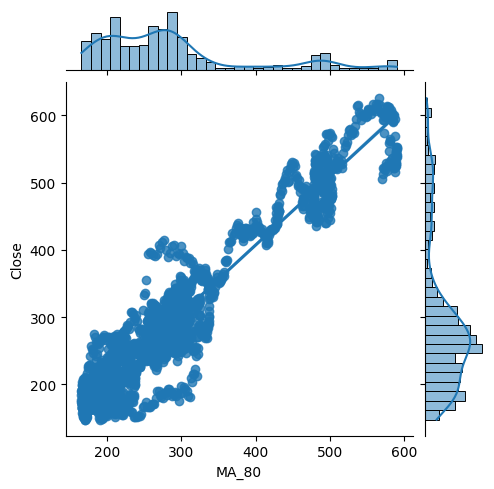

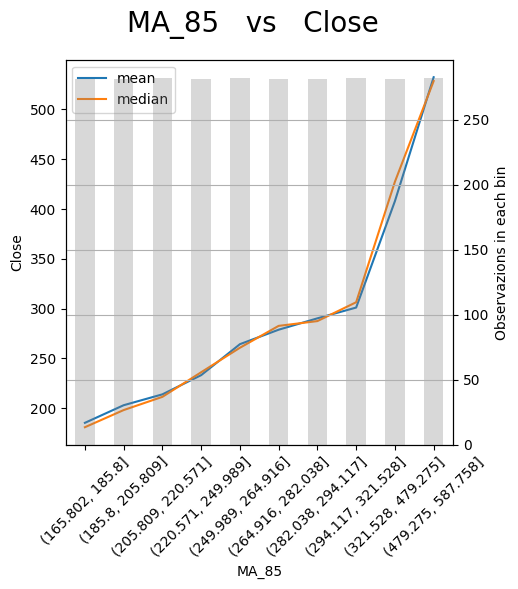

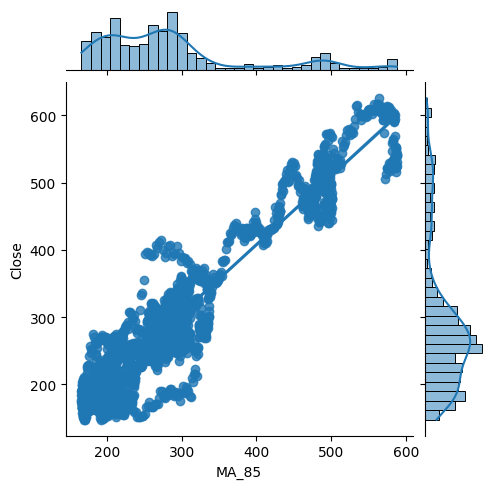

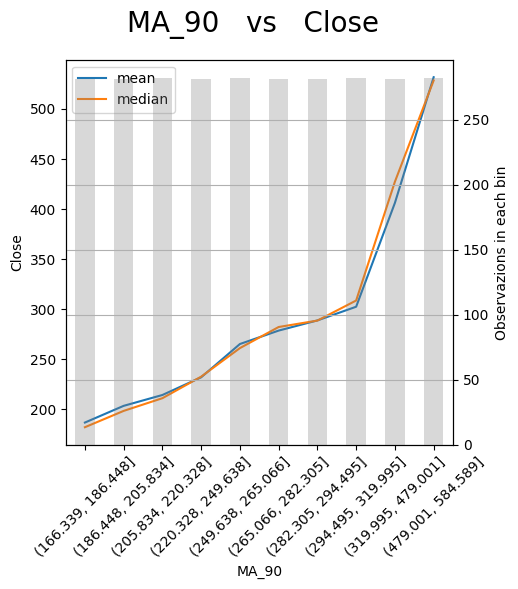

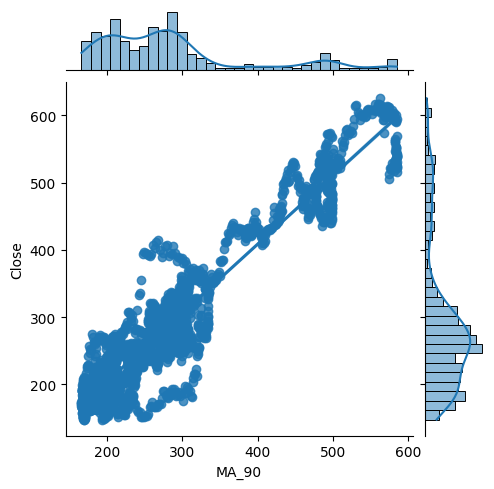

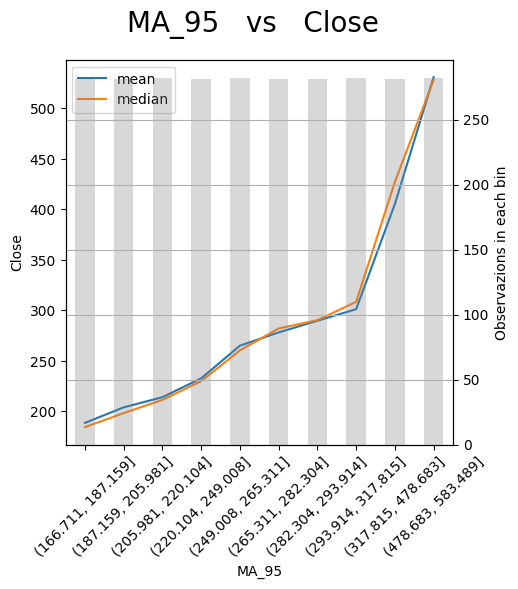

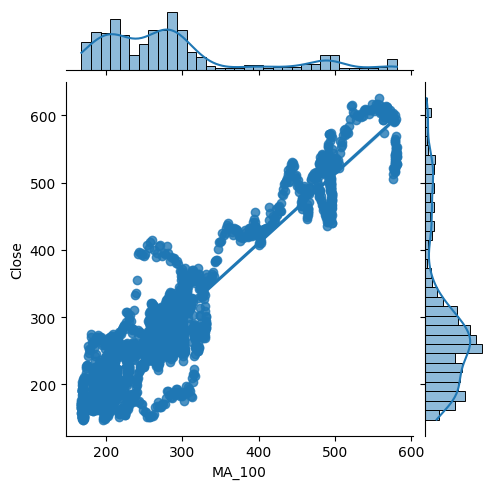

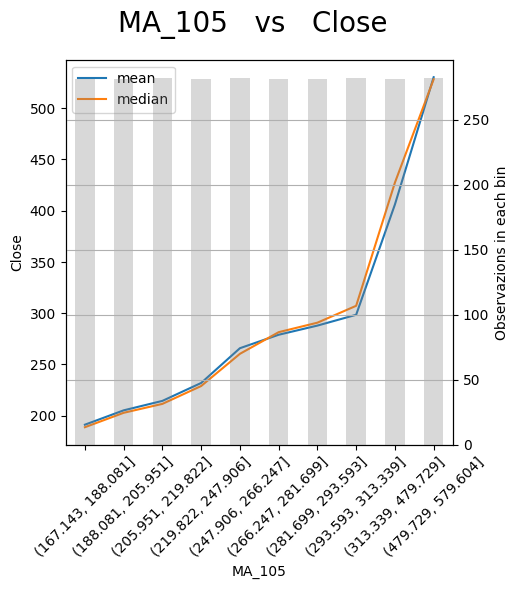

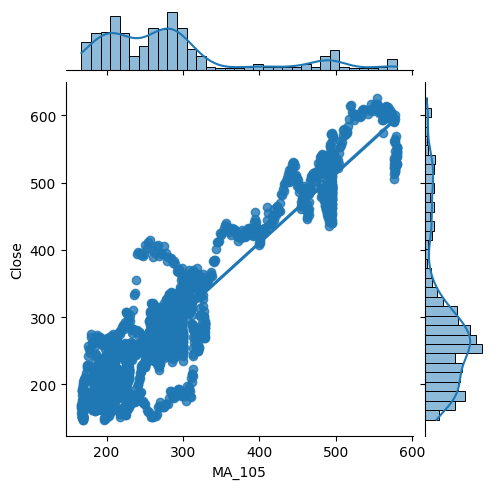

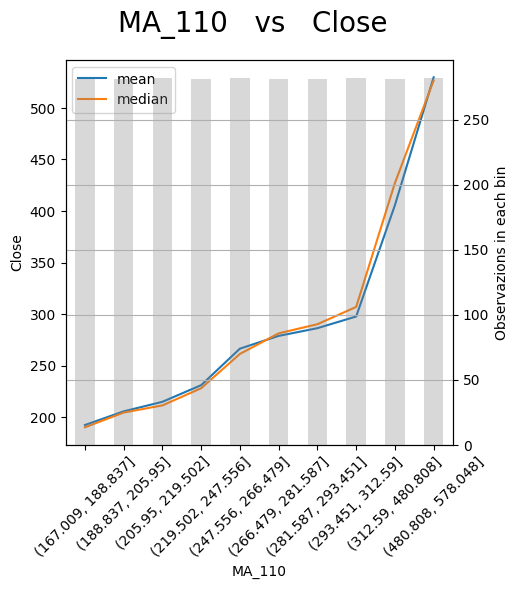

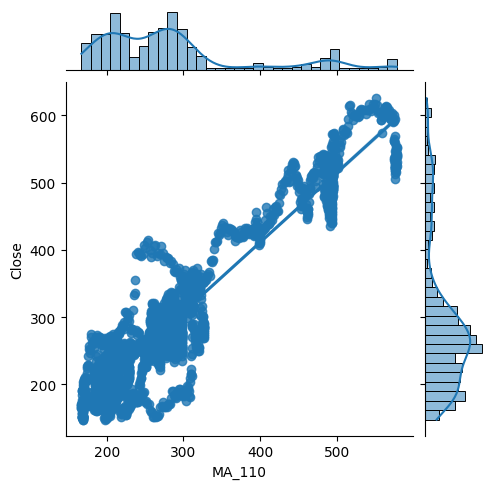

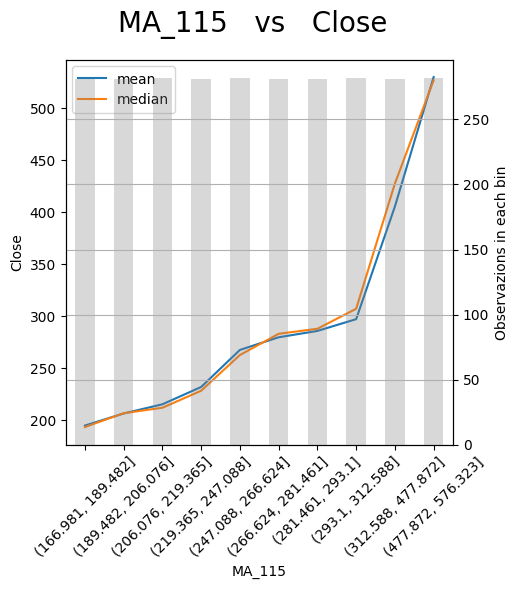

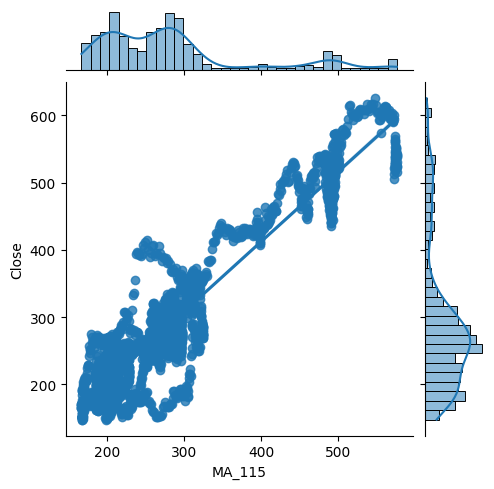

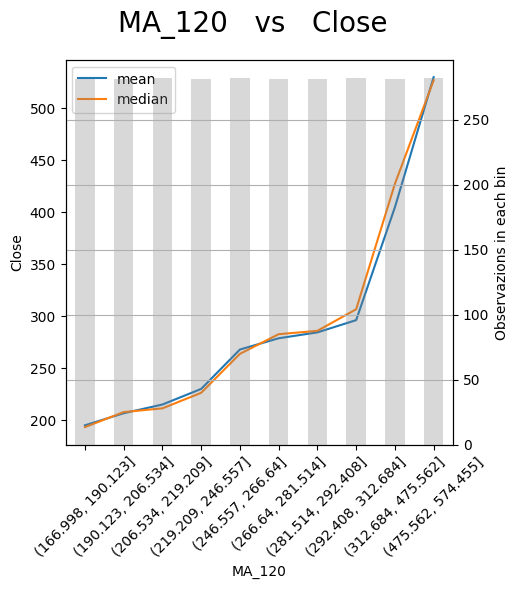

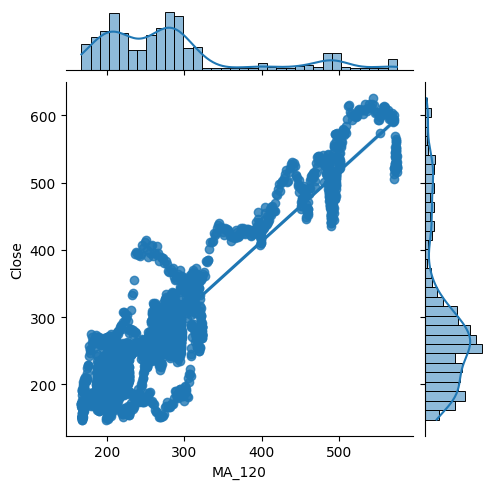

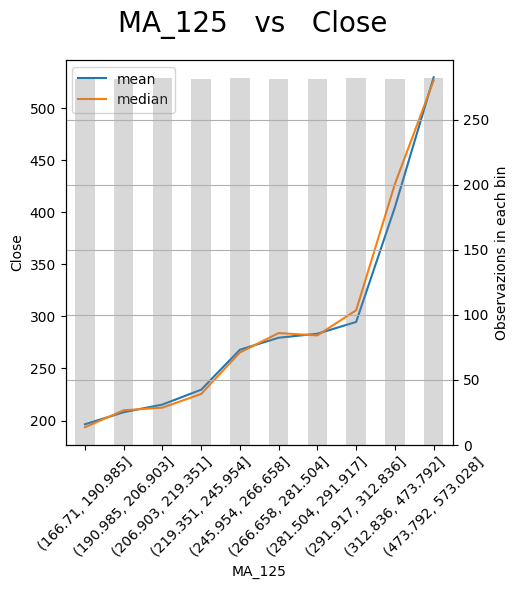

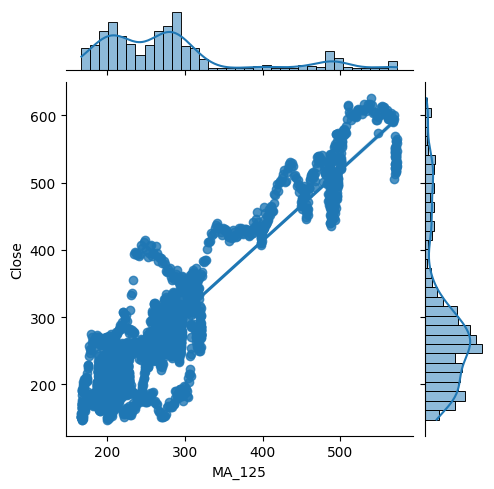

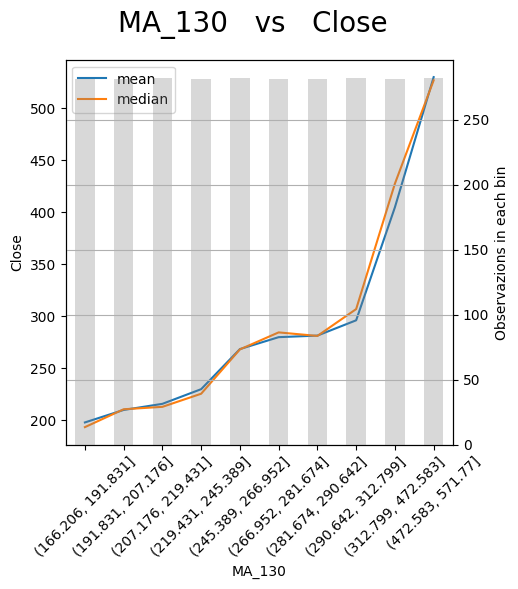

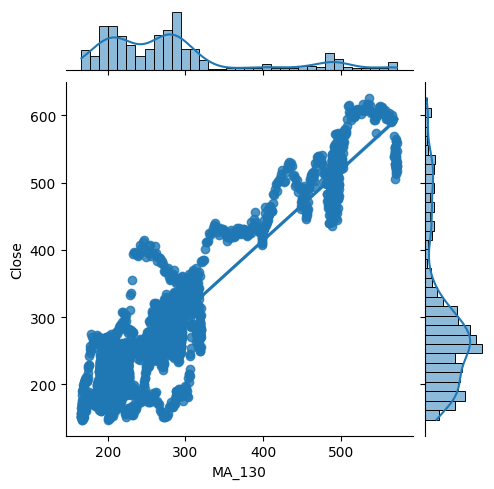

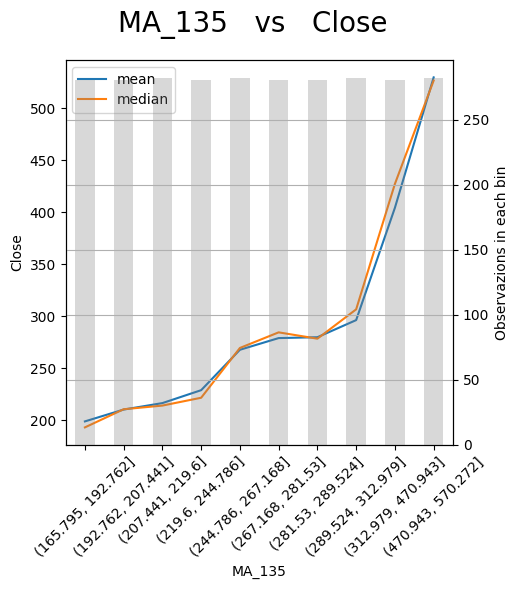

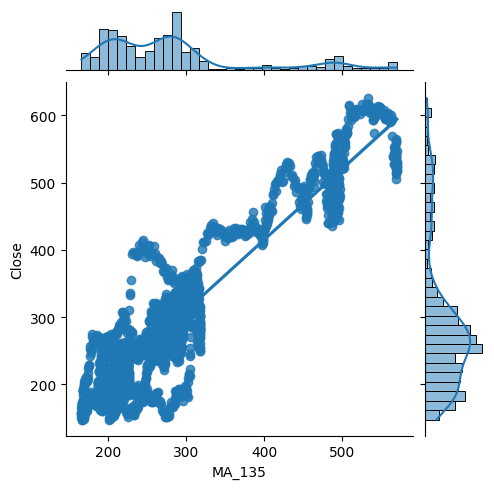

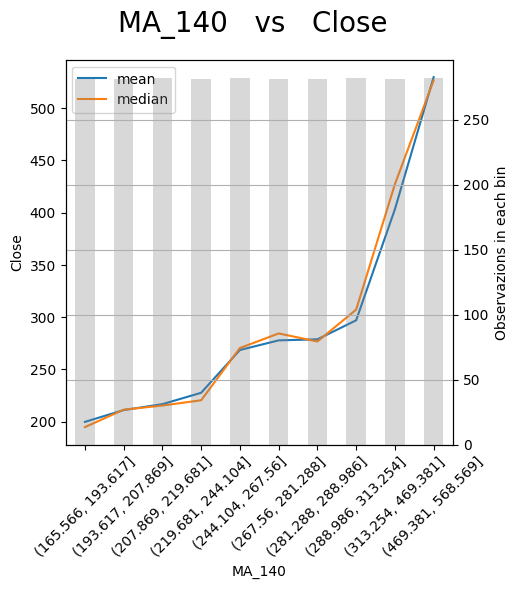

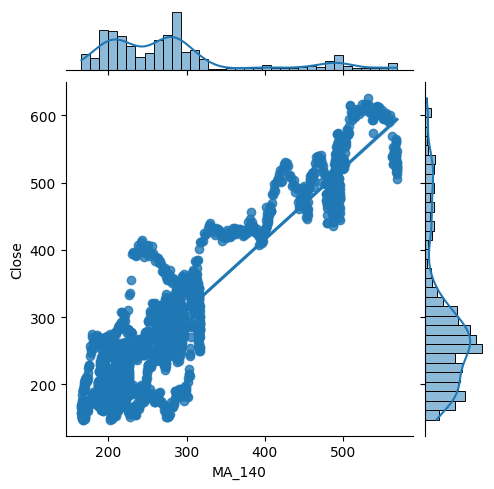

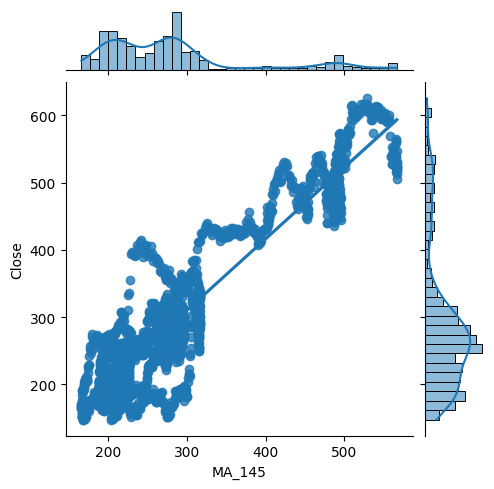

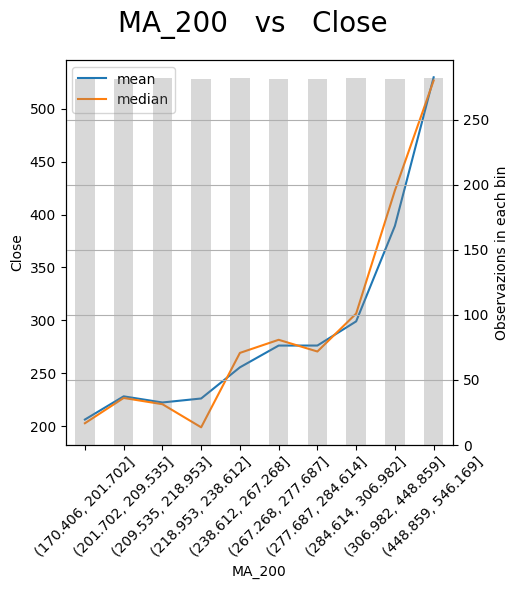

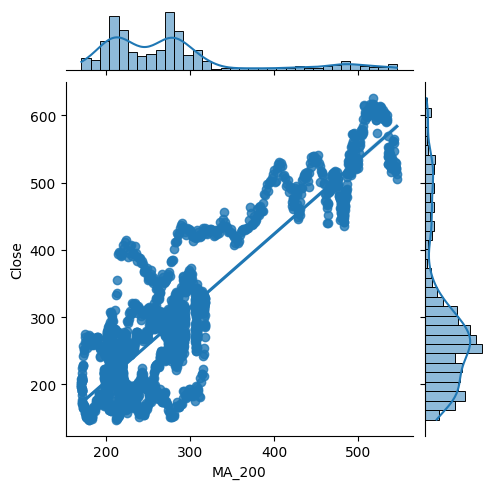

In [128]:
import matplotlib.pyplot as plt

for column in columns:
  x, y = column, lbl
  figsize = (5,5)
  ### bin plot
  dtf_noNan = df1[df1[x].notnull()]
  breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
  groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,duplicates='drop')])[y].agg(['mean','median','size'])
  fig, ax = plt.subplots(figsize=figsize)
  fig.suptitle(x+"   vs   "+y, fontsize=20)
  groups[["mean", "median"]].plot(kind="line", ax=ax)
  groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
  ax.set(ylabel=y)
  ax.right_ax.set_ylabel("Observazions in each bin")
  plt.show()
### scatter plot
  sns.jointplot(x=x, y=y, data=df1, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
  plt.show()

  print("\n")

In [129]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [130]:
import numpy as np

In [131]:
df1

Close       Price        MA_5       MA_10       MA_15       MA_20   
0     183.979996  190.875000  191.539001  188.778001  185.022334  187.673750  \
1     190.979996  183.979996  191.004001  189.530501  184.877000  187.116000   
2     190.630005  190.979996  190.832999  189.908000  185.694333  186.678500   
3     190.139999  190.630005  190.257999  190.097501  186.947000  186.363250   
4     190.940002  190.139999  189.320999  190.259500  187.941000  186.108500   
...          ...         ...         ...         ...         ...         ...   
2810  519.200012  529.799988  525.450000  542.120001  537.546667  534.007501   
2811  521.849976  519.200012  523.290002  537.920001  537.423336  533.417502   
2812  521.549988  521.849976  522.579993  533.934998  537.033333  533.252499   
2813  512.750000  521.549988  523.379993  529.609998  536.950000  533.157498   
2814  505.350006  512.750000  521.029993  524.994995  535.353333  532.977499   

           MA_25       MA_30       MA_35       MA_40  ...      MA_110   
0     189.359200  189.021500  190.562857  191.126125  ...  215.872591  \
1     189.050600  188.942833  190.086428  190.826250  ...  215.403545   
2     188.727000  189.199333  189.886714  190.881125  ...  215.028545   
3     188.313799  189.464500  189.539714  190.800375  ...  214.652045   
4     188.169199  189.475667  189.189857  190.619375  ...  214.335363   
...          ...         ...         ...         ...  ...         ...   
2810  535.755999  537.704999  537.664284  544.094998  ...  575.359546   
2811  534.402000  536.871665  537.071427  542.328749  ...  575.285001   
2812  533.775999  536.086664  536.604283  540.569998  ...  575.176364   
2813  533.003999  535.234998  535.691425  538.597498  ...  575.177273   
2814  531.823999  534.001664  535.274283  536.557498  ...  575.045910   

          MA_115      MA_120      MA_125      MA_130      MA_135      MA_140   
0     217.788652  219.646083  221.938000  224.357461  226.374704  228.210857  \
1     217.062391  218.999416  221.081479  223.670115  225.679555  227.582464   
2     216.426174  218.422250  220.324719  222.989076  225.031851  226.972821   
3     215.779782  217.802583  219.606079  222.254577  224.355777  226.337143   
4     215.158130  217.201041  218.973040  221.471961  223.684111  225.697178   
...          ...         ...         ...         ...         ...         ...   
2810  573.393479  571.643751  571.449200  571.151924  570.054074  568.551429   
2811  573.388697  571.442917  571.024800  570.877308  569.908148  568.518572   
2812  573.294349  571.320834  570.607200  570.599231  569.790000  568.568572   
2813  573.157392  571.293334  570.222000  570.213077  569.706297  568.499286   
2814  573.005653  571.218334  569.785600  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
0     229.892827  230.954266  238.920325  
1     229.292103  230.453966  238.493625  
2     228.713172  230.005433  238.137325  
3     228.118965  229.529266  237.790000  
4     227.460551  229.035099  237.467150  
...          ...         ...         ...  
2810  566.830690  565.549000  545.124001  
2811  566.822759  565.512000  545.378501  
2812  566.895517  565.453000  545.638501  
2813  566.893103  565.423667  545.923750  
2814  566.847931  565.321000  546.169000  

[2815 rows x 33 columns]

In [132]:
Y = df1[columns].pop('Close')
Y

0       183.979996
1       190.979996
2       190.630005
3       190.139999
4       190.940002
           ...    
2810    519.200012
2811    521.849976
2812    521.549988
2813    512.750000
2814    505.350006
Name: Close, Length: 2815, dtype: float64

In [133]:
X = df1.drop(columns=['Close'])

In [134]:
X

Price        MA_5       MA_10       MA_15       MA_20       MA_25   
0     190.875000  191.539001  188.778001  185.022334  187.673750  189.359200  \
1     183.979996  191.004001  189.530501  184.877000  187.116000  189.050600   
2     190.979996  190.832999  189.908000  185.694333  186.678500  188.727000   
3     190.630005  190.257999  190.097501  186.947000  186.363250  188.313799   
4     190.139999  189.320999  190.259500  187.941000  186.108500  188.169199   
...          ...         ...         ...         ...         ...         ...   
2810  529.799988  525.450000  542.120001  537.546667  534.007501  535.755999   
2811  519.200012  523.290002  537.920001  537.423336  533.417502  534.402000   
2812  521.849976  522.579993  533.934998  537.033333  533.252499  533.775999   
2813  521.549988  523.379993  529.609998  536.950000  533.157498  533.003999   
2814  512.750000  521.029993  524.994995  535.353333  532.977499  531.823999   

           MA_30       MA_35       MA_40       MA_45  ...      MA_110   
0     189.021500  190.562857  191.126125  192.626112  ...  215.872591  \
1     188.942833  190.086428  190.826250  192.095889  ...  215.403545   
2     189.199333  189.886714  190.881125  191.812111  ...  215.028545   
3     189.464500  189.539714  190.800375  191.466222  ...  214.652045   
4     189.475667  189.189857  190.619375  191.105556  ...  214.335363   
...          ...         ...         ...         ...  ...         ...   
2810  537.704999  537.664284  544.094998  549.915554  ...  575.359546   
2811  536.871665  537.071427  542.328749  548.233332  ...  575.285001   
2812  536.086664  536.604283  540.569998  546.494443  ...  575.176364   
2813  535.234998  535.691425  538.597498  544.684443  ...  575.177273   
2814  534.001664  535.274283  536.557498  542.902220  ...  575.045910   

          MA_115      MA_120      MA_125      MA_130      MA_135      MA_140   
0     217.788652  219.646083  221.938000  224.357461  226.374704  228.210857  \
1     217.062391  218.999416  221.081479  223.670115  225.679555  227.582464   
2     216.426174  218.422250  220.324719  222.989076  225.031851  226.972821   
3     215.779782  217.802583  219.606079  222.254577  224.355777  226.337143   
4     215.158130  217.201041  218.973040  221.471961  223.684111  225.697178   
...          ...         ...         ...         ...         ...         ...   
2810  573.393479  571.643751  571.449200  571.151924  570.054074  568.551429   
2811  573.388697  571.442917  571.024800  570.877308  569.908148  568.518572   
2812  573.294349  571.320834  570.607200  570.599231  569.790000  568.568572   
2813  573.157392  571.293334  570.222000  570.213077  569.706297  568.499286   
2814  573.005653  571.218334  569.785600  569.756154  569.470000  568.352500   

          MA_145      MA_150      MA_200  
0     229.892827  230.954266  238.920325  
1     229.292103  230.453966  238.493625  
2     228.713172  230.005433  238.137325  
3     228.118965  229.529266  237.790000  
4     227.460551  229.035099  237.467150  
...          ...         ...         ...  
2810  566.830690  565.549000  545.124001  
2811  566.822759  565.512000  545.378501  
2812  566.895517  565.453000  545.638501  
2813  566.893103  565.423667  545.923750  
2814  566.847931  565.321000  546.169000  

[2815 rows x 32 columns]

In [135]:
import sklearn.preprocessing

In [136]:
features = X.columns

In [137]:
features

Index(['Price', 'MA_5', 'MA_10', 'MA_15', 'MA_20', 'MA_25', 'MA_30', 'MA_35',
       'MA_40', 'MA_45', 'MA_50', 'MA_55', 'MA_60', 'MA_65', 'MA_70', 'MA_75',
       'MA_80', 'MA_85', 'MA_90', 'MA_95', 'MA_100', 'MA_105', 'MA_110',
       'MA_115', 'MA_120', 'MA_125', 'MA_130', 'MA_135', 'MA_140', 'MA_145',
       'MA_150', 'MA_200'],
      dtype='object')

In [138]:
X = sklearn.preprocessing.minmax_scale(X)

In [139]:

from pandas.core.frame import DataFrame
X = DataFrame(X,columns=[features])

In [140]:
X

Price      MA_5     MA_10     MA_15     MA_20     MA_25     MA_30   
0     0.091009  0.091242  0.084006  0.074987  0.080435  0.082751  0.079004  \
1     0.076588  0.090101  0.085627  0.074672  0.079221  0.082075  0.078831   
2     0.091229  0.089736  0.086440  0.076444  0.078269  0.081367  0.079395   
3     0.090497  0.088510  0.086848  0.079159  0.077583  0.080462  0.079979   
4     0.089472  0.086511  0.087197  0.081314  0.077029  0.080145  0.080003   
...        ...       ...       ...       ...       ...       ...       ...   
2810  0.799849  0.803534  0.845115  0.839258  0.834125  0.841473  0.846149   
2811  0.777680  0.798927  0.836068  0.838990  0.832841  0.838507  0.844316   
2812  0.783222  0.797412  0.827484  0.838145  0.832482  0.837136  0.842589   
2813  0.782595  0.799119  0.818168  0.837964  0.832275  0.835445  0.840715   
2814  0.764190  0.794106  0.808227  0.834502  0.831883  0.832861  0.838002   

         MA_35     MA_40     MA_45  ...    MA_110    MA_115    MA_120   
0     0.079329  0.078568  0.079512  ...  0.118878  0.124120  0.129211  \
1     0.078275  0.077902  0.078330  ...  0.117737  0.122346  0.127624   
2     0.077833  0.078023  0.077698  ...  0.116825  0.120792  0.126207   
3     0.077065  0.077844  0.076928  ...  0.115909  0.119212  0.124686   
4     0.076291  0.077442  0.076124  ...  0.115138  0.117694  0.123210   
...        ...       ...       ...  ...       ...       ...       ...   
2810  0.847327  0.862805  0.875410  ...  0.993460  0.992843  0.993102   
2811  0.846015  0.858880  0.871663  ...  0.993279  0.992832  0.992609   
2812  0.844982  0.854973  0.867789  ...  0.993014  0.992601  0.992309   
2813  0.842962  0.850590  0.863757  ...  0.993017  0.992266  0.992241   
2814  0.842039  0.846058  0.859787  ...  0.992697  0.991896  0.992057   

        MA_125    MA_130    MA_135    MA_140    MA_145    MA_150    MA_200  
0     0.135922  0.143385  0.149772  0.155445  0.160271  0.163388  0.182333  
1     0.133814  0.141690  0.148053  0.153885  0.158775  0.162138  0.181197  
2     0.131952  0.140011  0.146452  0.152373  0.157332  0.161016  0.180249  
3     0.130183  0.138200  0.144781  0.150795  0.155852  0.159826  0.179325  
4     0.128625  0.136270  0.143120  0.149207  0.154212  0.158591  0.178466  
...        ...       ...       ...       ...       ...       ...       ...  
2810  0.996114  0.998477  0.999462  0.999957  0.999658  0.999783  0.997219  
2811  0.995070  0.997800  0.999101  0.999876  0.999638  0.999691  0.997896  
2812  0.994042  0.997114  0.998809  1.000000  0.999820  0.999543  0.998588  
2813  0.993094  0.996162  0.998602  0.999828  0.999814  0.999470  0.999347  
2814  0.992020  0.995035  0.998018  0.999464  0.999701  0.999213  1.000000  

[2815 rows x 32 columns]

In [141]:
Y=DataFrame(Y.array)
Y

0
0     183.979996
1     190.979996
2     190.630005
3     190.139999
4     190.940002
...          ...
2810  519.200012
2811  521.849976
2812  521.549988
2813  512.750000
2814  505.350006

[2815 rows x 1 columns]

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [144]:
print(len(X_train))
print(len(Y_train))

2252
2252


In [145]:
 import statsmodels.api as sm
 # add constant (intercept) manually
 X_train = sm.add_constant(X_train)
 # fit training data
 model = sm.GLSAR(Y_train, X_train).fit()

 df = pd.concat((model.params, model.tvalues), axis=1)
 #df.rename(columns={0: 'beta', 1: 't'}).to_excel('output.xls', 'sheet1')
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      0   R-squared:                       0.997
Model:                          GLSAR   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.147e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:02:42   Log-Likelihood:                -7295.2
No. Observations:                2251   AIC:                         1.466e+04
Df Residuals:                    2218   BIC:                         1.485e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         147.5149      0.407    362.850      0.000     146.718     148.312
('Price',)    469.7598     10.404     45.153      0.000     449.358     490.162
('MA_5',)      17.9413     21.225      0.845      0.398     -23.681      59.564
('MA_10',)    -19.3302     33.992     -0.569      0.570     -85.990      47.330
('MA_15',)     38.4936     50.234      0.766      0.444     -60.017     137.004
('MA_20',)    -35.5091     66.627     -0.533      0.594    -166.167      95.149
('MA_25',)    -11.4442     82.740     -0.138      0.890    -173.700     150.811
('MA_30',)     47.9235     99.298      0.483      0.629    -146.803     242.650
('MA_35',)    -50.6170    114.329     -0.443      0.658    -274.819     173.585
('MA_40',)    -31.8618    131.204     -0.243      0.808    -289.158     225.434
('MA_45',)    146.8384    149.381      0.983      0.326    -146.103     439.780
('MA_50',)   -176.4537    167.003     -1.057      0.291    -503.952     151.045
('MA_55',)    147.8670    179.560      0.823      0.410    -204.257     499.991
('MA_60',)   -194.0303    194.134     -0.999      0.318    -574.734     186.674
('MA_65',)    226.3896    213.884      1.058      0.290    -193.045     645.824
('MA_70',)   -118.6175    228.172     -0.520      0.603    -566.070     328.835
('MA_75',)     67.3645    239.415      0.281      0.778    -402.137     536.866
('MA_80',)   -143.5881    249.984     -0.574      0.566    -633.815     346.638
('MA_85',)    273.0822    265.471      1.029      0.304    -247.516     793.681
('MA_90',)   -282.0870    280.381     -1.006      0.314    -831.923     267.749
('MA_95',)    145.4069    295.673      0.492      0.623    -434.417     725.231
('MA_100',)    -6.5724    307.963     -0.021      0.983    -610.498     597.353
('MA_105',)  -334.9272    321.944     -1.040      0.298    -966.270     296.415
('MA_110',)   393.2724    340.003      1.157      0.248    -273.485    1060.030
('MA_115',)   124.8031    352.160      0.354      0.723    -565.795     815.401
('MA_120',)  -367.3195    366.359     -1.003      0.316   -1085.761     351.122
('MA_125',)   436.4117    381.617      1.144      0.253    -311.953    1184.776
('MA_130',)  -625.1195    394.541     -1.584      0.113   -1398.828     148.589
('MA_135',)   483.3319    406.993      1.188      0.235    -314.796    1281.460
('MA_140',)  -455.3384    414.789     -1.098      0.272   -1268.754     358.077
('MA_145',)   520.2348    371.683      1.400      0.162    -208.649    1249.118
('MA_150',)  -194.4533    170.147     -1.143      0.253    -528.117     139.211
('MA_200',)   -13.4924      8.004     -1.686      0.092     -29.188       2.204
==============================================================================
Omnibus:                      585.773   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarqu

In [146]:
X_test1 = sm.add_constant(X_test)
Y_pred= model.predict(X_test1[-100:])

In [147]:
test_pred_comparison = pd.DataFrame(list(zip(Y_test,Y_pred)),columns = ['Actual','Predicted'])
test_pred_comparison.head()
Y_test = Y_test[-100:].squeeze()
test_pred_comparison = pd.DataFrame(list(zip(Y_test,Y_pred)),columns = ['Actual','Predicted'])
test_pred_comparison.head(10)

Actual   Predicted
0  200.050003  194.227342
1  289.399994  295.989546
2  153.324997  152.201418
3  263.299988  261.590977
4  506.500000  503.205073
5  350.549988  352.902718
6  183.979996  190.607439
7  167.110001  162.312418
8  243.000000  243.588140
9  257.899994  251.258734

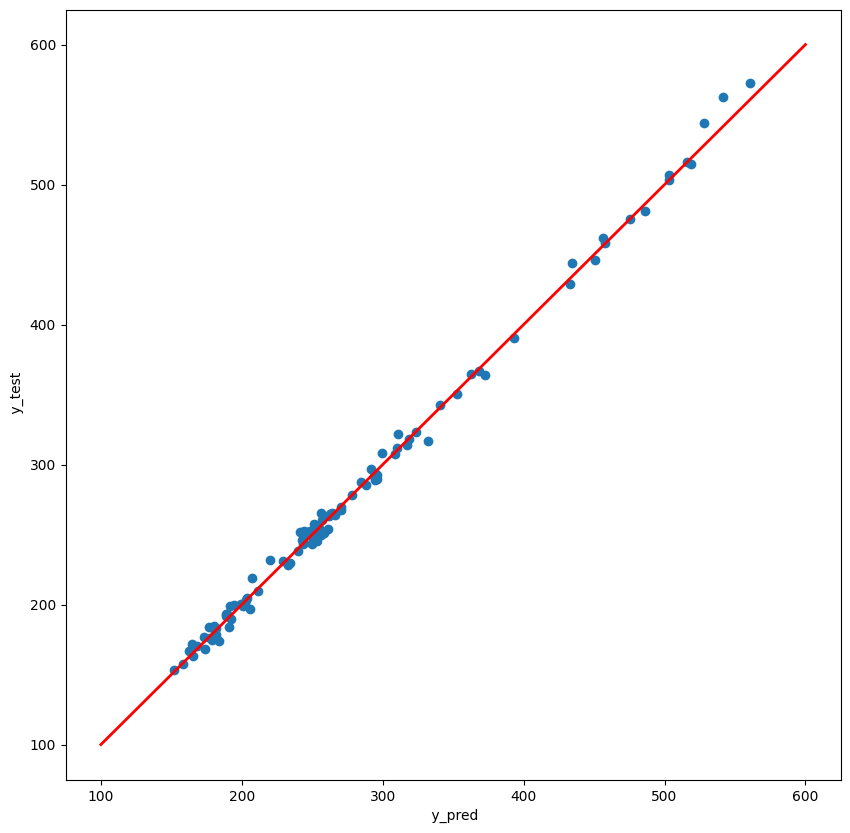

In [149]:
import numpy as np
import matplotlib.pyplot as plt

x = Y_pred
y = Y_test

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x, y)


plt.xlabel(" y_pred")
plt.ylabel(" y_test")
plt.plot([100, 600], [100, 600], color = 'red', linewidth = 2)

plt.show()

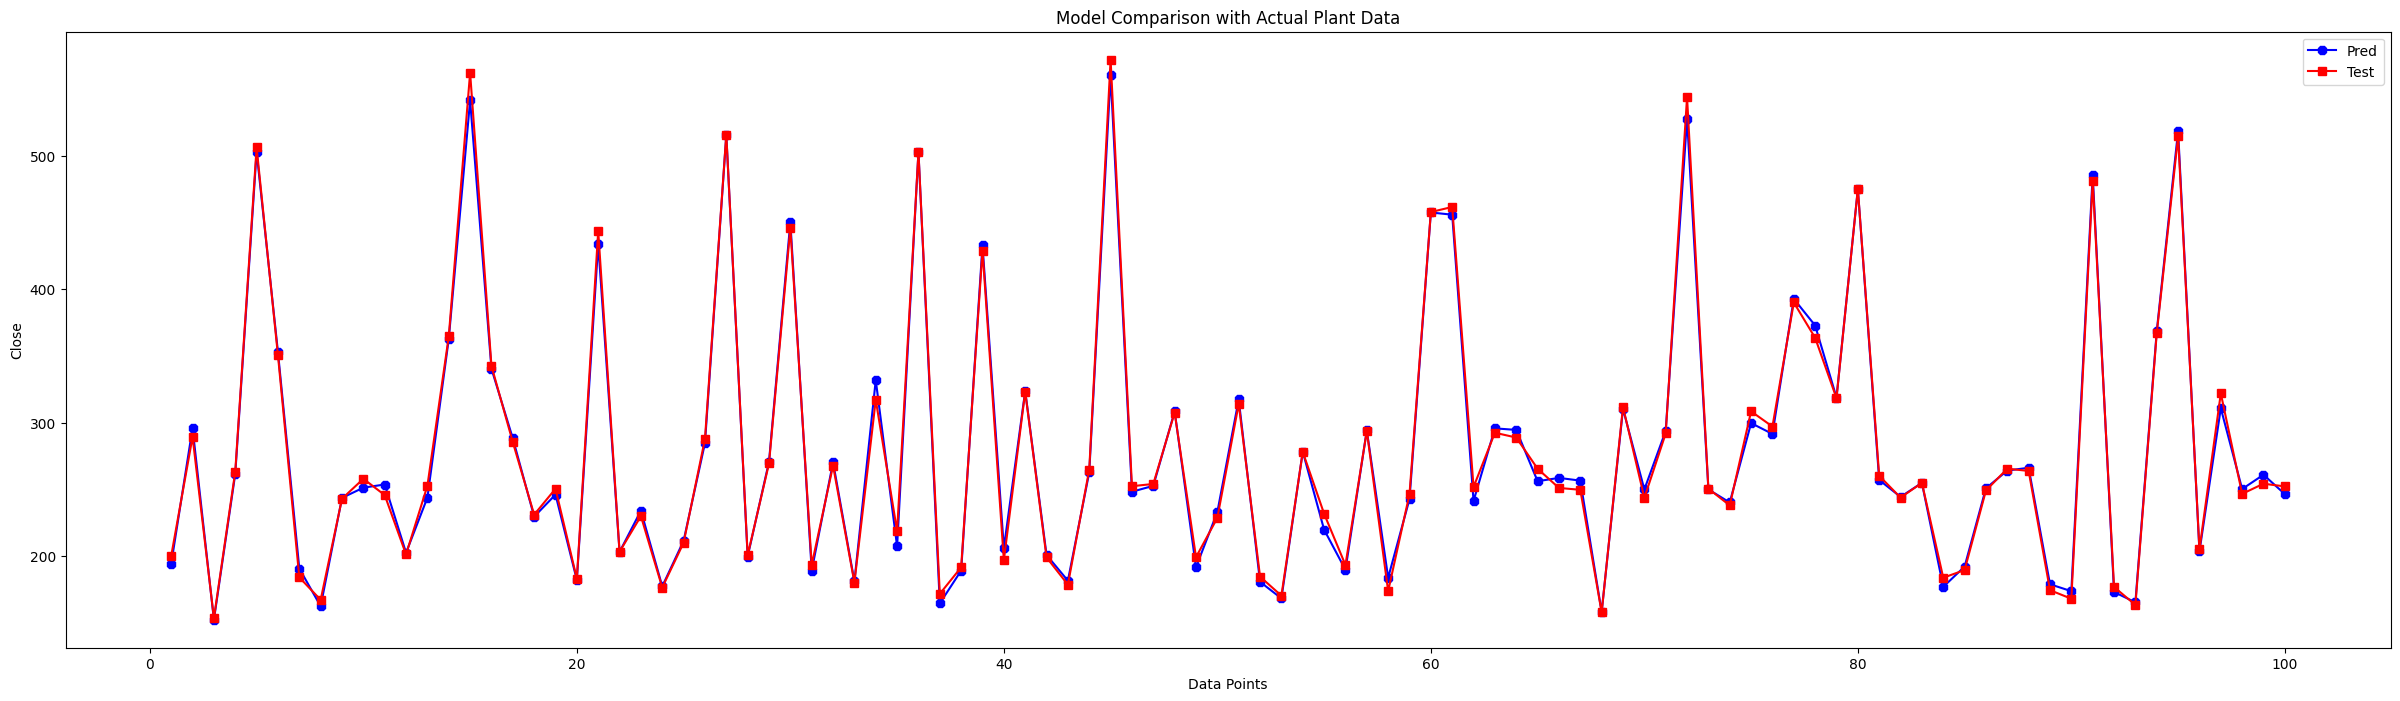

In [150]:
sno = []
for i in range(0,len(Y_test)):
  sno.append(i+1)


import matplotlib.pyplot as plt

import numpy as np

y1 = Y_pred
y2 = Y_test
x = sno
# Plotting the Data
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(x, y1, label='Pred',c='b',marker='8')
plt.plot(x, y2, label='Test',c='r',marker='s')
plt.xlabel('Data Points')
plt.ylabel(lbl)
plt.title("Model Comparison with Actual Plant Data")

  
  
plt.legend()

In [151]:
from sklearn.metrics import mean_squared_error

  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_test,Y_pred)

33.47385819067406

In [152]:
#calculating root_mean_squared_error

np.sqrt(mean_squared_error(Y_test,Y_pred))

5.78565970228755

In [153]:
from sklearn.metrics import r2_score

r2_score(Y_test,Y_pred)

0.9967716043271216

In [23]:
df = df.drop(columns=['Date'])

AttributeError: ignored

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [25]:
print(df)

[[5.16868460e-07]
 [5.29723908e-07]
 [4.34914593e-07]
 ...
 [6.46962362e-07]
 [6.35962156e-07]
 [5.56066726e-07]]


In [28]:
df.shape

(7437, 1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1961, 1056)

In [ ]:
train_data

array([[0.28203035],
       [0.26393943],
       [0.25507175],
       ...,
       [0.29664954],
       [0.29727695],
       [0.30407412]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train

array([[0.28203035, 0.26393943, 0.25507175, ..., 0.25015686, 0.2273602 ,
        0.21483248],
       [0.26393943, 0.25507175, 0.24026434, ..., 0.2273602 , 0.21483248,
        0.21805328],
       [0.25507175, 0.24026434, 0.23577823, ..., 0.21483248, 0.21805328,
        0.22607396],
       ...,
       [0.29079348, 0.28713346, 0.29163004, ..., 0.26527798, 0.28002259,
        0.28838834],
       [0.28713346, 0.29163004, 0.28274143, ..., 0.28002259, 0.28838834,
        0.29623123],
       [0.29163004, 0.28274143, 0.27772199, ..., 0.28838834, 0.29623123,
        0.29664954]])

In [ ]:
print(X_train.shape), print(y_train.shape)

(1950, 10)
(1950,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1045, 10)
(1045,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 7s 63ms/step - loss: 0.0082 - val_loss: 0.0155
Epoch 2/100
31/31 [==============================] - 1s 25ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 6.3574e-04 - val_loss: 0.0017
Epoch 4/100
31/31 [==============================] - 1s 42ms/step - loss: 6.2959e-04 - val_loss: 0.0017
Epoch 5/100
31/31 [==============================] - 1s 30ms/step - loss: 6.0349e-04 - val_loss: 0.0021
Epoch 6/100
31/31 [==============================] - 1s 26ms/step - loss: 5.9605e-04 - val_loss: 0.0017
Epoch 7/100
31/31 [==============================] - 1s 26ms/step - loss: 5.8172e-04 - val_loss: 0.0016
Epoch 8/100
31/31 [==============================] - 1s 26ms/step - loss: 5.7651e-04 - val_loss: 0.0017
Epoch 9/100
31/31 [==============================] - 1s 26ms/step - loss: 5.5812e-04 - val_loss: 0.0020
Epoch 10/100
31/31 [==============================] - 1s 27ms/step - los

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

33/33 [==============================] - 0s 6ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

243.0191665590556

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

389.86931712869307

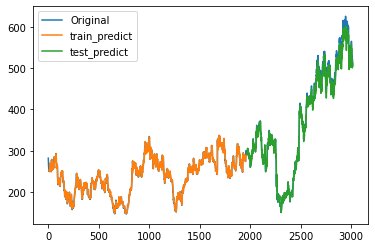

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='Original')
plt.plot(trainPredictPlot, label='train_predict')
plt.plot(testPredictPlot, label='test_predict')
plt.legend()
plt.show()

In [ ]:
len(test_data)

1056

In [ ]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
x_input

array([[0.89197719, 0.91508768, 0.93401517, 0.97626223, 0.97919017,
        0.95869411, 0.94938718, 0.9310871 , 0.94844601, 0.94614548,
        0.94468145, 0.95231525, 0.94269456, 0.94478599, 0.96266789,
        0.96622323, 0.96214503, 0.96465465, 0.96455011, 0.95179239,
        0.96360893, 0.96245867, 0.98285019, 0.96538673, 0.96141295,
        0.97103364, 0.98117706, 0.97396158, 0.98169992, 1.        ,
        0.9800268 , 0.9536746 , 0.95597526, 0.95597526, 0.9328649 ,
        0.9328649 , 0.89229096, 0.94060312, 0.95064212, 0.94886432,
        0.97134728, 0.97532106, 0.9721839 , 0.97260222, 0.95754384,
        0.95733462, 0.94802783, 0.96277244, 0.93652492, 0.93976662,
        0.93600206, 0.94687743, 0.95294265, 0.93192373, 0.92878657,
        0.9254402 , 0.93035515, 0.94760951, 0.93485167, 0.88120637,
        0.82107753, 0.81741752, 0.84941649, 0.79472534, 0.79629392,
        0.82996614, 0.83247589, 0.83603124, 0.8415736 , 0.84376958,
        0.84847532, 0.81595349, 0.82295975, 0.82

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8919771939599397,
 0.9150876821898106,
 0.9340151674546311,
 0.9762622336545239,
 0.979190169783468,
 0.9586941062759629,
 0.9493871831724539,
 0.9310871036744628,
 0.948446010696598,
 0.9461454803344831,
 0.944681448444399,
 0.9523152469526222,
 0.9426945571400867,
 0.9447859947969999,
 0.9626678888845877,
 0.9662232307803609,
 0.9621450294703593,
 0.964654652537676,
 0.9645501061850752,
 0.9517923875383938,
 0.9636089337092193,
 0.9624586685281618,
 0.9828501856830663,
 0.96538673230833,
 0.9614129496997053,
 0.9710336395122408,
 0.9811770610877804,
 0.9739615756411848,
 0.9816999205020087,
 1.0,
 0.980026795906723,
 0.9536746048388813,
 0.9559752628522205,
 0.9559752628522205,
 0.9328649022735735,
 0.9328649022735735,
 0.8922909606689664,
 0.9406031194831732,
 0.9506421223573363,
 0.9488643237582255,
 0.9713472785700432,
 0.975321061178668,
 0.9721839046932983,
 0.9726022177549256,
 0.9575438410949053,
 0.9573346207384794,
 0.9480278252861947,
 0.9627724352371885,
 0.936524918173

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7518801]
101
1 day input [0.91508768 0.93401517 0.97626223 0.97919017 0.95869411 0.94938718
 0.9310871  0.94844601 0.94614548 0.94468145 0.95231525 0.94269456
 0.94478599 0.96266789 0.96622323 0.96214503 0.96465465 0.96455011
 0.95179239 0.96360893 0.96245867 0.98285019 0.96538673 0.96141295
 0.97103364 0.98117706 0.97396158 0.98169992 1.         0.9800268
 0.9536746  0.95597526 0.95597526 0.9328649  0.9328649  0.89229096
 0.94060312 0.95064212 0.94886432 0.97134728 0.97532106 0.9721839
 0.97260222 0.95754384 0.95733462 0.94802783 0.96277244 0.93652492
 0.93976662 0.93600206 0.94687743 0.95294265 0.93192373 0.92878657
 0.9254402  0.93035515 0.94760951 0.93485167 0.88120637 0.82107753
 0.81741752 0.84941649 0.79472534 0.79629392 0.82996614 0.83247589
 0.83603124 0.8415736  0.84376958 0.84847532 0.81595349 0.82295975
 0.82588782 0.82139117 0.80235914 0.79012428 0.78656881 0.77171953
 0.78144476 0.78154931 0.79545742 0.78520933 0.81428036 0.80811059
 0.86552058 0.8665663  0.87304971 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
len(df1)

3017

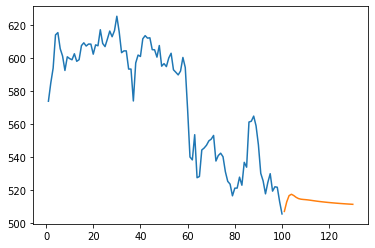

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

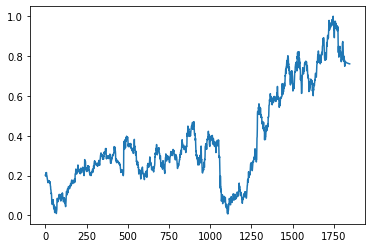

In [ ]:


df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

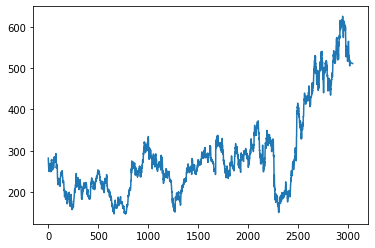

In [ ]:


plt.plot(df3)